In [1]:
! pip install -q kaggle


In [2]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"manshuuu","key":"b8a37081892bd7ca92808811139cc47c"}'}

In [3]:
 ! mkdir ~/.kaggle

In [4]:
! cp kaggle.json ~/.kaggle/



In [5]:
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle datasets download -d danofer/india-census



  0% 0.00/609k [00:00<?, ?B/s]
100% 609k/609k [00:00<00:00, 84.8MB/s]


In [7]:
! unzip india-census.zip

Archive:  india-census.zip
  inflating: hlpca-colnames.csv      
  inflating: india-districts-census-2011.csv  
  inflating: india_census_housing-hlpca-full.csv  


CENSUS DATA ANALYSIS

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression , LogisticRegression
from sklearn.metrics import  r2_score, accuracy_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [9]:
demographic_data = pd.read_csv('/content/india-districts-census-2011.csv')
housing_data = pd.read_csv('/content/india_census_housing-hlpca-full.csv')
print(demographic_data.head())
print(housing_data.head())

   District code         State name District name  Population    Male  Female  \
0              1  JAMMU AND KASHMIR       Kupwara      870354  474190  396164   
1              2  JAMMU AND KASHMIR        Badgam      753745  398041  355704   
2              3  JAMMU AND KASHMIR   Leh(Ladakh)      133487   78971   54516   
3              4  JAMMU AND KASHMIR        Kargil      140802   77785   63017   
4              5  JAMMU AND KASHMIR         Punch      476835  251899  224936   

   Literate  Male_Literate  Female_Literate    SC  ...  \
0    439654         282823           156831  1048  ...   
1    335649         207741           127908   368  ...   
2     93770          62834            30936   488  ...   
3     86236          56301            29935    18  ...   
4    261724         163333            98391   556  ...   

   Power_Parity_Rs_90000_150000  Power_Parity_Rs_45000_150000  \
0                            94                           588   
1                           126   

In [10]:
merged_data = pd.merge(demographic_data, housing_data, left_on='District code', right_on='District Code')

# Drop the redundant column after the merge
merged_data.drop(columns=['District code'], inplace=True)

print(merged_data.head())

          State name District name  Population    Male  Female  Literate  \
0  JAMMU AND KASHMIR       Kupwara      870354  474190  396164    439654   
1  JAMMU AND KASHMIR       Kupwara      870354  474190  396164    439654   
2  JAMMU AND KASHMIR       Kupwara      870354  474190  396164    439654   
3  JAMMU AND KASHMIR        Badgam      753745  398041  355704    335649   
4  JAMMU AND KASHMIR        Badgam      753745  398041  355704    335649   

   Male_Literate  Female_Literate    SC  Male_SC  ...  Contition_T_Total  \
0         282823           156831  1048     1046  ...                100   
1         282823           156831  1048     1046  ...                100   
2         282823           156831  1048     1046  ...                100   
3         207741           127908   368      343  ...                100   
4         207741           127908   368      343  ...                100   

   Contition_T_Good  Contition_T_Livable  Contition_T_Dilapidated  \
0              33

In [11]:
merged_data.describe()

,Population,Male,Female,Literate,Male_Literate,Female_Literate,SC,Male_SC,Female_SC,ST,...,Contition_T_Total,Contition_T_Good,Contition_T_Livable,Contition_T_Dilapidated,Contition_R_Total,Residence_Good,Residence_Livable,Residence_Dilapidated,Residence_cum_other,Residence_cum_Good
count,1.908000e+03,1.908000e+03,1.908000e+03,1.908000e+03,1.908000e+03,1.908000e+03,1.908000e+03,1.908000e+03,1.908000e+03,1.908000e+03,...,1908.0,1908.000000,1908.000000,1908.000000,1908.000000,1908.000000,1908.000000,1908.000000,1908.000000,1908.000000
mean,1.889969e+06,9.726771e+05,9.172923e+05,1.189641e+06,6.775743e+05,5.120668e+05,3.154404e+05,1.621846e+05,1.532558e+05,1.642242e+05,...,100.0,53.694209,41.547301,4.757180,96.236116,51.840928,39.777642,4.617820,3.763884,1.856688
std,1.531829e+06,7.938213e+05,7.393755e+05,1.055056e+06,5.851590e+05,4.739487e+05,3.130516e+05,1.611674e+05,1.520580e+05,2.507524e+05,...,0.0,14.925468,12.985402,3.091075,3.791460,14.883375,12.416863,3.024833,3.791460,1.620250
min,8.004000e+03,4.414000e+03,3.590000e+03,4.436000e+03,2.614000e+03,1.822000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,100.0,11.500000,6.700000,0.000000,41.300000,11.300000,6.400000,0.000000,0.100000,0.100000
25%,8.225260e+05,4.201570e+05,4.034140e+05,4.870390e+05,2.785340e+05,2.016178e+05,8.683075e+04,4.398675e+04,4.337575e+04,7.322000e+03,...,100.0,43.100000,31.000000,2.400000,95.500000,40.975000,30.000000,2.300000,1.700000,0.900000
50%,1.563715e+06,7.992360e+05,7.594840e+05,9.597440e+05,5.499230e+05,4.048610e+05,2.467490e+05,1.259240e+05,1.181440e+05,6.165400e+04,...,100.0,53.750000,41.400000,4.200000,97.200000,51.300000,39.400000,4.000000,2.800000,1.400000
75%,2.583052e+06,1.337560e+06,1.264202e+06,1.599151e+06,9.186250e+05,6.640860e+05,4.504730e+05,2.285480e+05,2.155900e+05,2.224492e+05,...,100.0,65.600000,51.250000,6.400000,98.300000,63.925000,48.900000,6.200000,4.500000,2.400000
max,1.106015e+07,5.865078e+06,5.195070e+06,8.227161e+06,4.591396e+06,3.635765e+06,2.464032e+06,1.266504e+06,1.197528e+06,1.580850e+06,...,100.0,92.100000,75.900000,19.700000,99.900000,90.100000,73.800000,19.500000,58.700000,17.700000


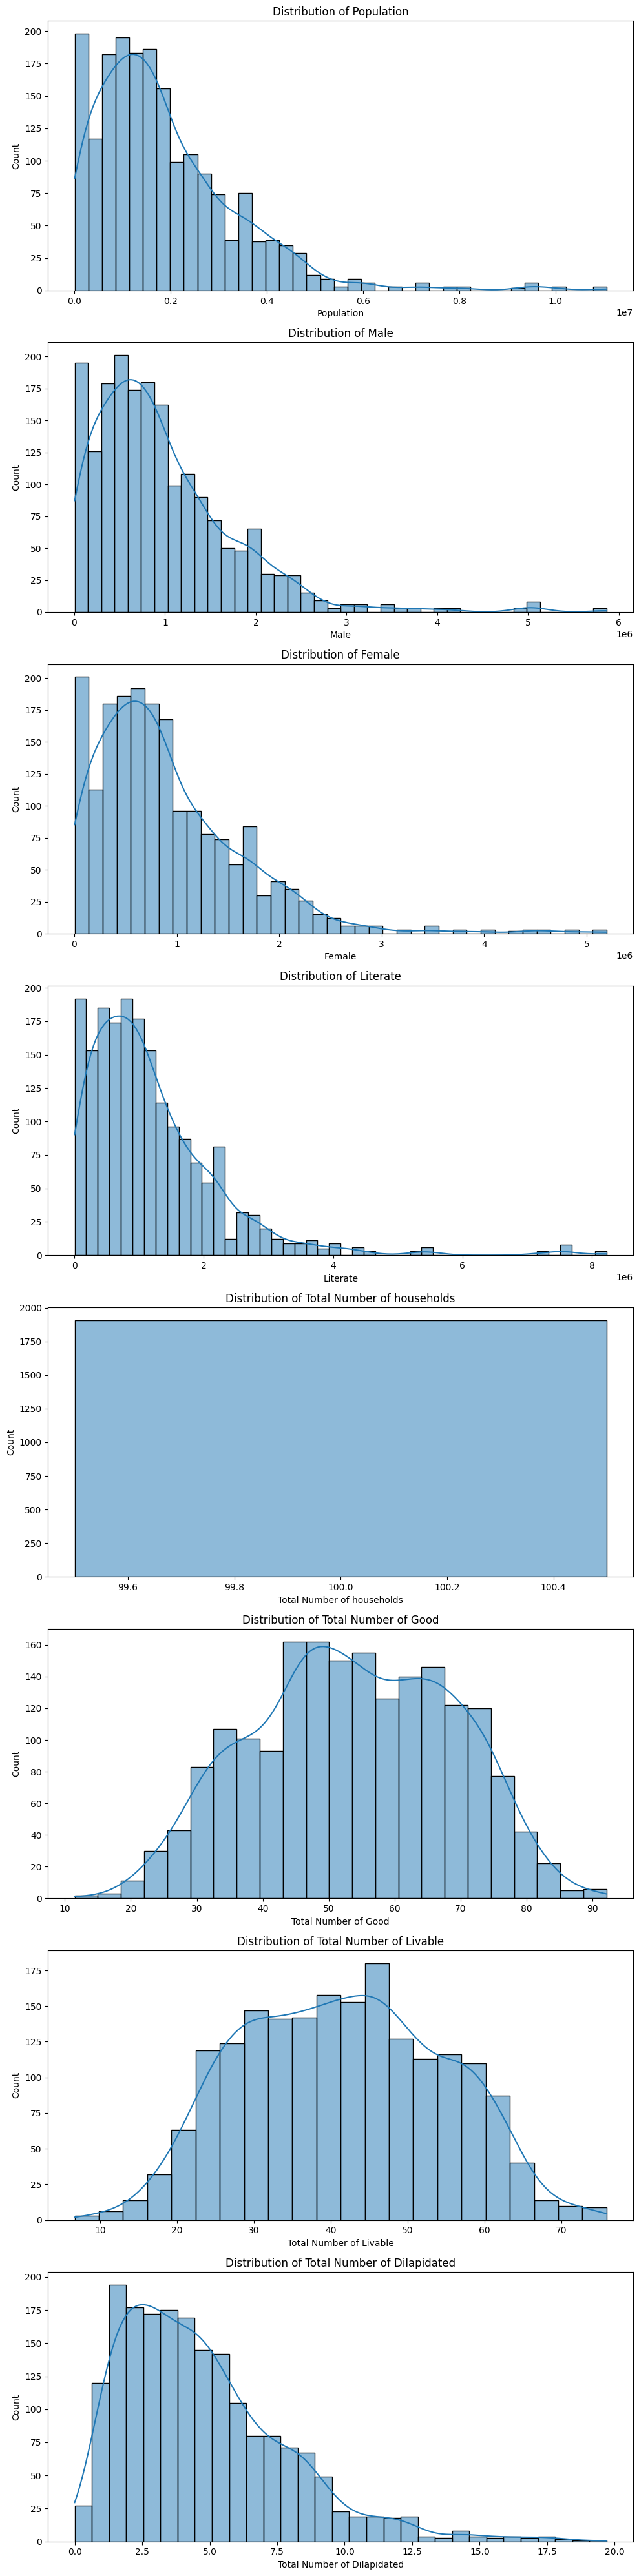

In [12]:
# Select a subset of columns to visualize
columns_to_visualize_merged = ['Population', 'Male', 'Female', 'Literate', 'Total Number of households', 'Total Number of Good', 'Total Number of Livable', 'Total Number of Dilapidated']

# Create a figure and axis for the plots
fig, ax = plt.subplots(len(columns_to_visualize_merged), figsize=(10, 40))

# Loop over the columns and create a histogram for each
for i, column in enumerate(columns_to_visualize_merged):
    sns.histplot(merged_data[column], ax=ax[i], kde=True)
    ax[i].set_title(f'Distribution of {column}')

# Display the plots
plt.tight_layout()
plt.show()



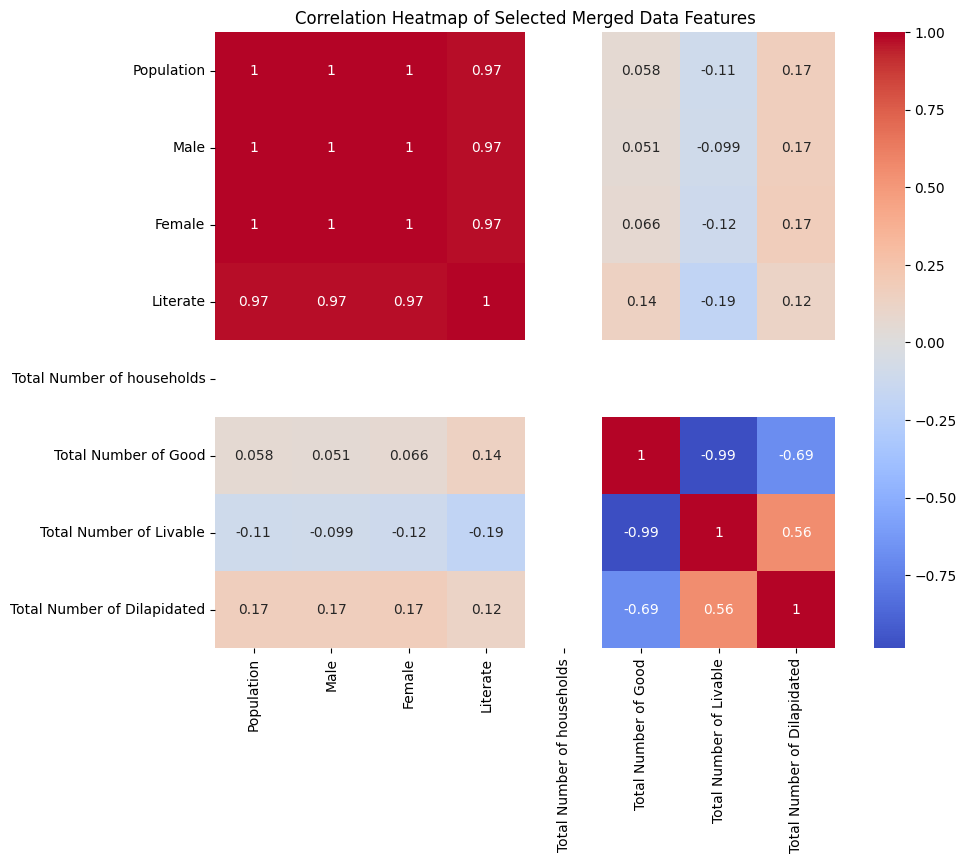

In [13]:
# Calculate the correlation matrix for the selected columns in the merged data
merged_corr = merged_data[columns_to_visualize_merged].corr()

# Display the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(merged_corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Selected Merged Data Features')
plt.show()

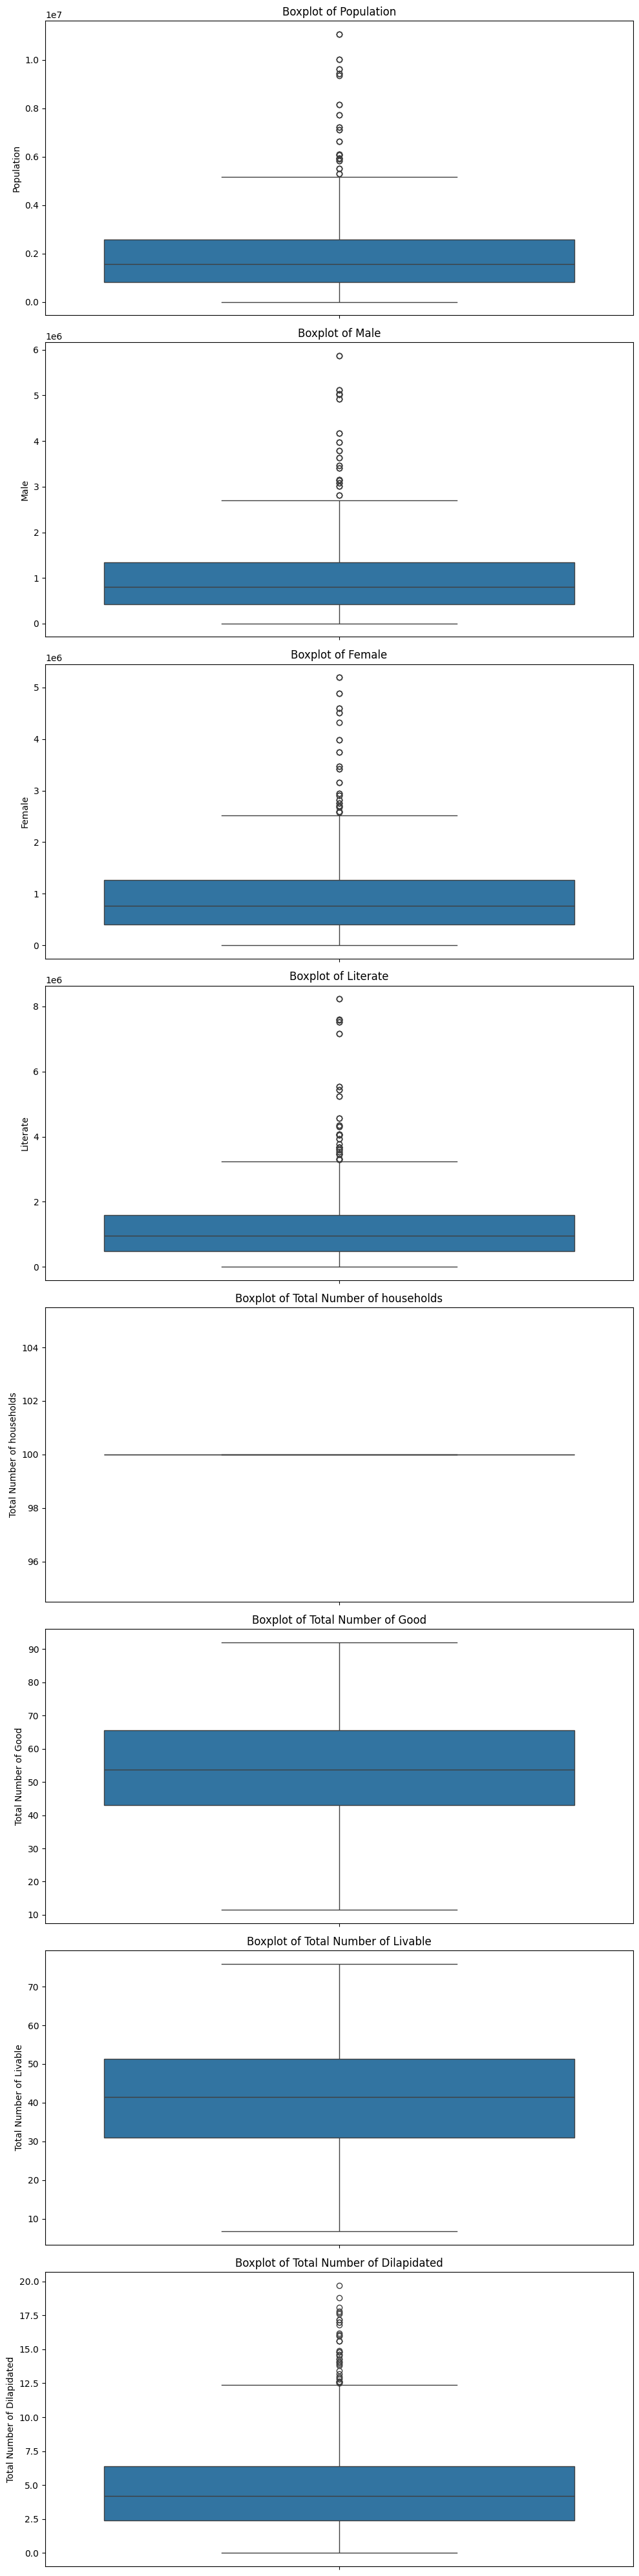

In [ ]:
# Create a figure and axis for the plots
fig, ax = plt.subplots(len(columns_to_visualize_merged), figsize=(10, 40))

# Loop over the columns and create a boxplot for each
for i, column in enumerate(columns_to_visualize_merged):
    sns.boxplot(y=merged_data[column], ax=ax[i])
    ax[i].set_title(f'Boxplot of {column}')

# Display the plots
plt.tight_layout()
plt.show()


In [15]:
#Predictive Modelling
from sklearn.model_selection import train_test_split

# Define the target variable and predictor variables
target = 'Literate'
predictors = ['Population', 'Male', 'Female', 'Total Number of households', 'Total Number of Good', 'Total Number of Livable', 'Total Number of Dilapidated']

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(merged_data[predictors], merged_data[target], test_size=0.2, random_state=42)


In [17]:
from sklearn.linear_model import LinearRegression

# Initialize a Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)


LinearRegression()

In [25]:
from sklearn.metrics import  r2_score

# Use the model to make predictions on the test data
y_pred = model.predict(X_test)



# Calculate the R^2 score
r2 = r2_score(y_test, y_pred)

r2


1.0

In [19]:
# Create a binary target variable based on population
merged_data['Urban'] = merged_data['Population'].apply(lambda x: 1 if x > merged_data['Population'].quantile(0.75) else 0)

# Display the first few rows of the merged data to confirm that the new variable was created correctly
merged_data.head()


,State name,District name,Population,Male,Female,Literate,Male_Literate,Female_Literate,SC,Male_SC,...,Contition_T_Good,Contition_T_Livable,Contition_T_Dilapidated,Contition_R_Total,Residence_Good,Residence_Livable,Residence_Dilapidated,Residence_cum_other,Residence_cum_Good,Urban
0,JAMMU AND KASHMIR,Kupwara,870354,474190,396164,439654,282823,156831,1048,1046,...,33.6,58.1,8.3,90.9,32.7,51.0,7.2,9.1,1.0,0
1,JAMMU AND KASHMIR,Kupwara,870354,474190,396164,439654,282823,156831,1048,1046,...,34.8,57.3,7.9,91.0,33.8,50.2,6.9,9.0,0.9,0
2,JAMMU AND KASHMIR,Kupwara,870354,474190,396164,439654,282823,156831,1048,1046,...,45.7,49.5,4.8,91.8,45.0,42.2,4.5,8.2,0.7,0
3,JAMMU AND KASHMIR,Badgam,753745,398041,355704,335649,207741,127908,368,343,...,49.7,46.3,3.9,97.2,49.0,44.5,3.7,2.8,0.7,0
4,JAMMU AND KASHMIR,Badgam,753745,398041,355704,335649,207741,127908,368,343,...,51.6,44.7,3.8,97.3,50.8,43.0,3.5,2.7,0.8,0


In [20]:
# Define the target variable and predictor variables
target = 'Urban'
predictors = ['Population', 'Male', 'Female', 'Total Number of households', 'Total Number of Good', 'Total Number of Livable', 'Total Number of Dilapidated']

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(merged_data[predictors], merged_data[target], test_size=0.2, random_state=42)


In [21]:
from sklearn.linear_model import LogisticRegression

# Initialize a Logistic Regression model
model = LogisticRegression()

# Train the model on the training data
model.fit(X_train, y_train)


LogisticRegression()

In [22]:
from sklearn.metrics import accuracy_score, f1_score

# Use the model to make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)

# Calculate the F1 score
f1 = f1_score(y_test, y_pred)

accuracy, f1


(1.0, 1.0)